In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [2]:
df_nasabah = pd.read_csv(r"./data_baru/new_data.csv")
df_nasabah.head()

,Unnamed: 0,number_of_dependents,net_income,loan_amount,amount_of_late,late_payment_amount,credit_score,arrears_amounts,aset,tenor,debtor_education_level,aging,loss_reverse
0,0,3.00,15500000.00,62500000.00,2.00,1.00,670.00,0.00,11000000.00,21.00,D3,DPK,0.00
1,1,3.00,17500000.00,70833333.33,31.00,3.00,402.00,1.00,17000000.00,18.00,D3,DPK,17708333.33
2,2,4.00,17500000.00,59333333.33,0.00,0.00,505.00,0.00,14500000.00,17.00,D2,Lancar,0.00
3,3,3.00,15500000.00,61166666.67,64.00,5.00,508.00,1.00,11500000.00,17.00,D2,DPK,15291666.67
4,4,5.00,8700000.00,56166666.67,14.00,2.00,371.00,0.00,5500000.00,15.00,SMA,DPK,0.00


In [3]:
columns = {}
for i in df_nasabah.columns:
    if df_nasabah[i].dtype == "category" or df_nasabah[i].dtype == "object":
        columns[i] = LabelEncoder().fit(df_nasabah[i])
        df_nasabah[i] = columns[i].transform(df_nasabah[i])

y_ = df_nasabah["loss_reverse"]
df_nasabah.drop("loss_reverse", axis=1, inplace=True)
scale = MinMaxScaler()
y = scale.fit_transform(y_.to_numpy().reshape(-1, 1))
scaler = RobustScaler().fit(df_nasabah[[i for i in df_nasabah.columns if i not in columns]])
X = pd.DataFrame(scaler.transform(df_nasabah[[i for i in df_nasabah.columns if i not in columns]]), columns=df_nasabah[[i for i in df_nasabah.columns if i not in columns]].columns)
for i in columns:
    X[i] = df_nasabah[i]
X.head(5)

,Unnamed: 0,number_of_dependents,net_income,loan_amount,amount_of_late,late_payment_amount,credit_score,arrears_amounts,aset,tenor,debtor_education_level,aging
0,-1.00,0.00,0.00,0.19,-0.80,-0.60,1.59,-1.00,0.60,0.91,2,0
1,-1.00,0.00,0.27,0.98,-0.41,-0.20,0.37,0.00,1.80,0.64,2,0
2,-1.00,0.50,0.27,-0.11,-0.83,-0.80,0.84,-1.00,1.30,0.55,1,3
3,-1.00,0.00,0.00,0.06,0.03,0.20,0.85,0.00,0.70,0.55,1,0
4,-1.00,1.00,-0.91,-0.41,-0.64,-0.40,0.22,-1.00,-0.50,0.36,7,0


In [4]:
df2 = X.drop(["Unnamed: 0"], axis=1)


In [5]:
X = df2
y = pd.Series(y.ravel())


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
reg = LazyRegressor(verbose=0, ignore_warnings=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models

  2%|▏         | 1/42 [00:00<00:19,  2.14it/s]

100%|██████████| 42/42 [00:35<00:00,  1.17it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001002 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 909
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 11
[LightGBM] [Info] Start training from score 0.119863


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,1.00,1.00,0.00,2.24
RandomForestRegressor,1.00,1.00,0.00,3.99
BaggingRegressor,1.00,1.00,0.00,0.53
NuSVR,1.00,1.00,0.00,14.59
DecisionTreeRegressor,1.00,1.00,0.00,0.08
GradientBoostingRegressor,1.00,1.00,0.00,1.23
LGBMRegressor,1.00,1.00,0.01,0.21
HistGradientBoostingRegressor,1.00,1.00,0.01,1.31
XGBRegressor,0.99,0.99,0.01,0.25


In [6]:
def evaluate_performa(X_test, y_test, model1, model2, model3, model4, model5, model6):
    rate = [0, 0, 0, 0, 0, 0]
    #difference = [0, 0, 0, 0, 0]

    X_test = X_test.reset_index(drop=True)
    for i, _ in X_test.iterrows():
        X = np.array(X_test.iloc[[i]])
        y = np.array(y_test.iloc[[i]])
        difference = [0, 0, 0, 0, 0, 0]
        difference[0] = abs(model1.predict(X) - y[0])
        difference[1] = abs(model2.predict(X) - y[0])
        difference[2] = abs(model3.predict(X) - y[0])
        difference[3] = abs(model4.predict(X) - y[0])
        difference[4] = abs(model5.predict(X) - y[0])
        difference[5] = abs(model6.predict(X) - y[0])
        
        print(difference)

        a = int(np.argmin(difference))
        print(a)
        for i in range(len(difference)):
            if difference[a] == difference[i]:
                rate[i] += 1
    
    a = f"Best model : {rate.index(max(rate))+1}"
    return a, rate

In [7]:
extra = ExtraTreesRegressor()
forest = RandomForestRegressor()
xgb = XGBRegressor()
gradient = GradientBoostingRegressor()
bagging = BaggingRegressor()
tree = DecisionTreeRegressor()

extra.fit(X_train, y_train)
forest.fit(X_train, y_train)
xgb.fit(X_train, y_train)
gradient.fit(X_train, y_train)
bagging.fit(X_train, y_train)
tree.fit(X_train, y_train)

a = evaluate_performa(X_test, y_test, extra, forest, xgb, gradient, bagging, tree)
a

[array([0.]), array([0.]), array([0.000233], dtype=float32), array([0.00081689]), array([0.]), array([0.])]
0
[array([4.66744457e-06]), array([9.71445147e-17]), array([0.00029749], dtype=float32), array([4.38994011e-05]), array([1.38777878e-17]), array([5.55111512e-17])]
4
[array([0.]), array([0.]), array([0.00046184], dtype=float32), array([0.00164551]), array([0.]), array([0.])]
0
[array([0.00030105]), array([0.00018203]), array([0.00193685], dtype=float32), array([0.00263313]), array([0.00049008]), array([0.])]
5
[array([4.9008168e-05]), array([2.33372229e-05]), array([0.00015265], dtype=float32), array([0.00103149]), array([7.00116686e-05]), array([0.])]
5
[array([1.6336056e-05]), array([7.00116686e-06]), array([0.00034852], dtype=float32), array([0.00070118]), array([0.]), array([0.])]
4
[array([3.2672112e-05]), array([3.73395566e-05]), array([0.00022319], dtype=float32), array([0.00220355]), array([4.66744457e-05]), array([0.])]
5
[array([0.00012835]), array([3.2672112e-05]), arr

('Best model : 6', [228, 235, 14, 16, 525, 733])

In [8]:
name = ["ExtraTreeRegressor", "RandomForest", "XGB", "GradientBoosting", "BaggingRegressor"]
estimators = [extra, forest, xgb, gradient, bagging]
r_square = [r2_score(y_test, i.predict(X_test)) for i in estimators]
mse = [mean_squared_error(y_test, i.predict(X_test)) for i in estimators]
mae = [mean_absolute_error(y_test, i.predict(X_test)) for i in estimators]
rmse = [i ** (1/2) for i in mse]
mape = [mean_absolute_percentage_error(y_test, i.predict(X_test)) for i in estimators]

estimate = pd.DataFrame({
    "name": name,
    "r_square": r_square,
    "mse": mse,
    "mae": mae,
    "rmse": rmse,
    "mape": mape
}
)
estimate

,name,r_square,mse,mae,rmse,mape
0,ExtraTreeRegressor,1.00,0.00,0.00,0.00,16143591663.11
1,RandomForest,1.00,0.00,0.00,0.00,0.00
2,XGB,0.99,0.00,0.00,0.01,127730564272.65
3,GradientBoosting,1.00,0.00,0.00,0.00,531192558254.93
4,BaggingRegressor,1.00,0.00,0.00,0.00,0.00


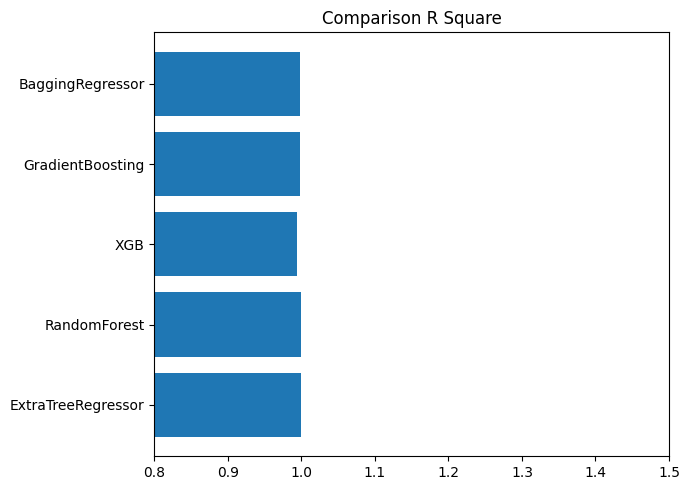

In [9]:
plt.figure(figsize=(7, 5))
plt.barh(estimate.name, estimate.r_square)
plt.title("Comparison R Square")
plt.xlim(0.8, 1.5)
plt.tight_layout()
plt.show()

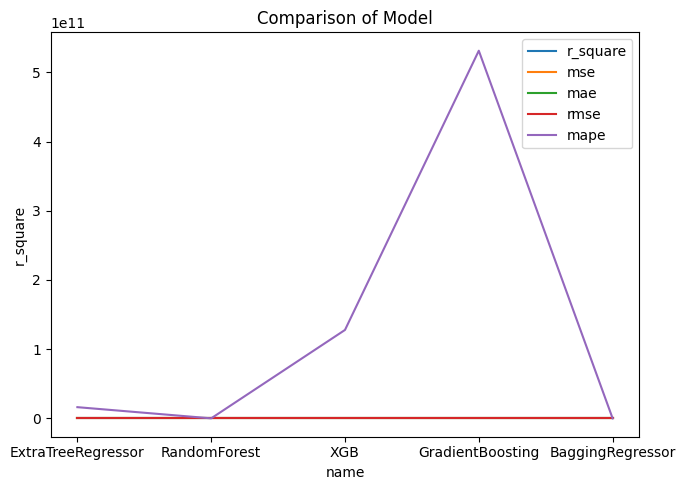

In [10]:
plt.figure(figsize=(7,5))
sns.lineplot(data=estimate, x="name", y="r_square", label="r_square")
sns.lineplot(data=estimate, x="name", y="mse", label="mse")
sns.lineplot(data=estimate, x="name", y="mae", label="mae")
sns.lineplot(data=estimate, x="name", y="rmse", label="rmse")
sns.lineplot(data=estimate, x="name", y="mape", label="mape")
plt.legend()
plt.title("Comparison of Model")
plt.tight_layout()